# FLAME Data Exploration 

In [76]:
# This notebook was built in Catherine's root environment. (Sorry Don!) 
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.formula.api import ols
import scipy.stats as stats

# plt.style.use('ggplot')

In [77]:
%matplotlib inline

In [78]:
import seaborn as sns
sns.set(color_codes=True)

In [79]:
%pwd
%cd /datadrive/JoinMe

/datadrive/JoinMe


## Initial Data Import and Some Cleaning


In [80]:
data = pd.read_csv('joinedFLAMEresults', low_memory=False)

In [81]:
data.head(1)

,Unnamed: 0,ltime,Latitude,Longitude,XCO2Dppm,XCH4Dppm,TempC,SPCuScm,ChlARFU,ChlAugL,...,chla3,cdom1,cdom2,cdom3,sed1,sed2,sed3,ktime,ChlAugL_tau_y,indicator_column3
0,0,2016-07-12 14:20:00,46.63423,-119.898911,587.17,55.4641,17.901,126.8,0.06,0.52,...,-0.000603,0.848039,1.151961,0.589595,0.0204,0.985294,0.848039,2016-07-12 14:20:00,0.485,both


In [82]:
#list(data.columns)

# Summary FLAME Stats

In [90]:
data.ChlAugL_tau_x.describe()

count    109333.000000
mean          2.703032
std           5.476517
min        -137.815000
25%           0.535000
50%           1.050000
75%           2.205000
max         350.395000
Name: ChlAugL_tau_x, dtype: float64

In [87]:
data.CO2Sat_tau.describe()

count    102896.000000
mean        136.578300
std          40.050280
min           0.002294
25%         120.371550
50%         138.558550
75%         149.569750
max         368.426000
Name: CO2Sat_tau, dtype: float64

In [88]:
data.CH4Sat_tau.describe()

count    104887.000000
mean       5472.194224
std        7629.382225
min          12.225131
25%        2198.829843
50%        3183.424084
75%        4849.790576
max      152820.157068
Name: CH4Sat_tau, dtype: float64

In [9]:
pd.pivot_table(data, values=["fDOMQSU", 'TurbFNU', 'ChlAugL'], 
               index =['AreaID'], aggfunc=[np.mean, np.median, np.std])

mean                      median                  \
                    ChlAugL   TurbFNU   fDOMQSU ChlAugL TurbFNU fDOMQSU   
AreaID                                                                    
Columbia River     1.934377  2.146762  0.465516    1.36    1.81    0.41   
Hanford Reach      0.587520  0.988850 -0.990909    0.57    0.89   -1.01   
John Day River    24.072018  6.857399  8.623386   25.74    8.29    9.86   
Lake Celilo        0.818822  2.149991  0.723259    0.83    1.87    0.77   
Lake Umatilla      1.866758  1.280713  0.500596    1.84    1.05    0.31   
Lake Wallula       2.409861  1.698100  0.594321    0.18    0.92    0.15   
Snake River        1.365879  2.730752  6.146022    1.48    2.09    6.21   
Willamette River   9.483115  2.147197  2.252765    7.60    2.02    2.29   

                       std                      
                   ChlAugL   TurbFNU   fDOMQSU  
AreaID                                          
Columbia River    1.969773  1.110928  0.251407  
Hanford Reach     0.202107  0.368497  0.100822  
John Day River    9.762089  2.202255  2.490002  
Lake Celilo       0.287214  0.895968  0.131702  
Lake Umatilla     1.383483  0.860568  1.533122  
Lake Wallula      6.388636  1.934017  2.403268  
Snake River       0.704775  1.678541  0.238508  
Willamette River  4.729843  0.472077  0.234731

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


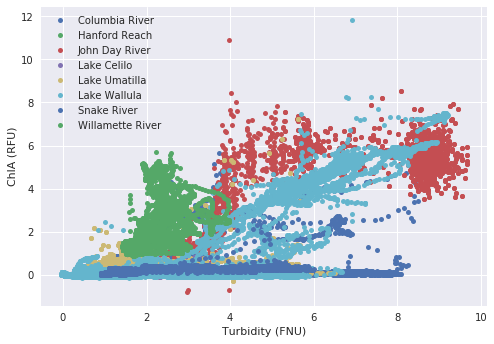

In [10]:
x = data['TurbFNU_tau']
y = data['ChlARFU_tau']

labels = data['AreaID']
df = pd.DataFrame(dict(x=x, y=y, label=labels))
df = df.loc[data['ChlAugL'] < 50]
# df = df.loc[data['chla3'] < 10]

groups = df.groupby(labels)

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

fig.suptitle('')
plt.xlabel('Turbidity (FNU)')
plt.ylabel('ChlA (RFU)')

plt.show()

# Reservoirs

In [52]:
short = data.loc[data['ChlAugL'] <= 50]
celilo = short.loc[(short['AreaID'] == 'Lake Celilo')]
wallula = short.loc[(short['AreaID'] == 'Lake Wallula')]
umatilla = short.loc[(short['AreaID'] == 'Lake Umatilla')]
reservoirs = celilo.append(wallula).append(umatilla)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


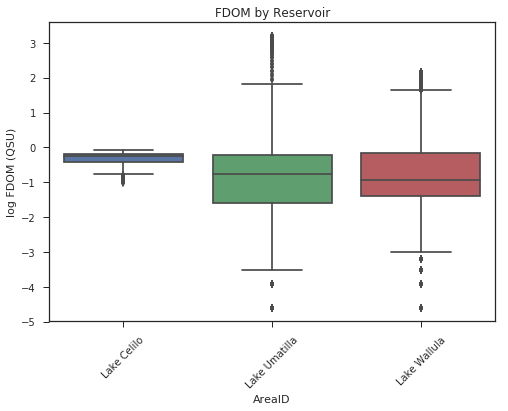

In [53]:
cols = ["Lake Celilo", "Lake Umatilla", "Lake Wallula"]

sns.set_style('ticks')
sns.boxplot(np.log(reservoirs.fDOMQSU), groupby = reservoirs.AreaID, order=cols)
plt.xticks(rotation=45)
plt.title('FDOM by Reservoir')
plt.ylabel('log FDOM (QSU)')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

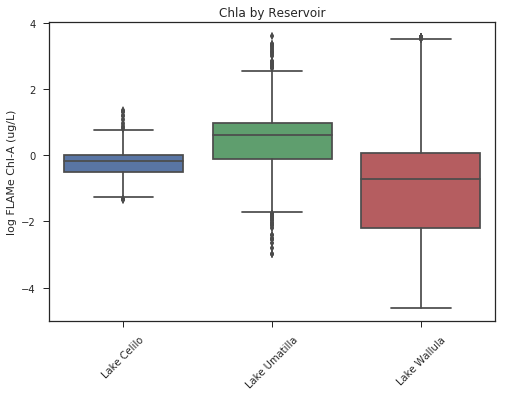

In [36]:
sns.set_style('ticks')
sns.boxplot(np.log(reservoirs.ChlAugL), groupby = reservoirs.AreaID, order = cols)
plt.xlabel('')
plt.title('Chla by Reservoir')
plt.ylabel('log FLAMe Chl-A (ug/L)')

plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

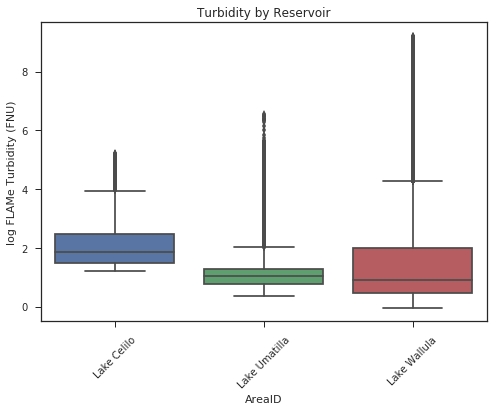

In [38]:
# sed = data.loc[data['sed1'] <= 0.08]
sns.set_style('ticks')
sns.boxplot(reservoirs.TurbFNU, groupby = reservoirs.AreaID, order = cols)
plt.title('Turbidity by Reservoir')
plt.ylabel('log FLAMe Turbidity (FNU)')
plt.xticks(rotation=45)

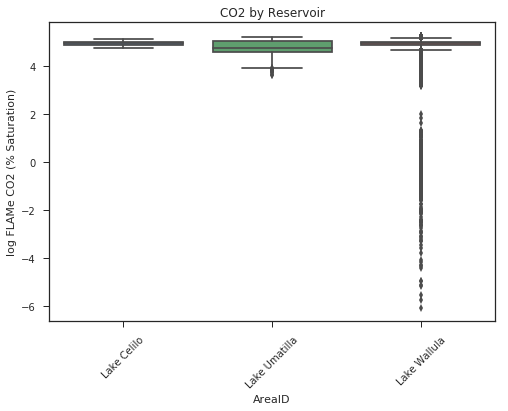

In [40]:
sns.set_style('ticks')
sns.boxplot(np.log(reservoirs.CO2Sat_tau), groupby = reservoirs.AreaID, order = cols)
plt.xticks(rotation=45)

plt.title('CO2 by Reservoir')
plt.ylabel('log FLAMe CO2 (% Saturation)')

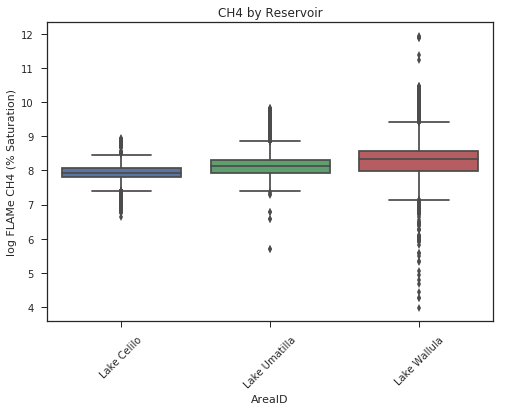

In [54]:
sns.set_style('ticks')
sns.boxplot(np.log(reservoirs.CH4Sat_tau), groupby = reservoirs.AreaID, order = cols)
plt.xticks(rotation=45)

plt.title('CH4 by Reservoir')
plt.ylabel('log FLAMe CH4 (% Saturation)')

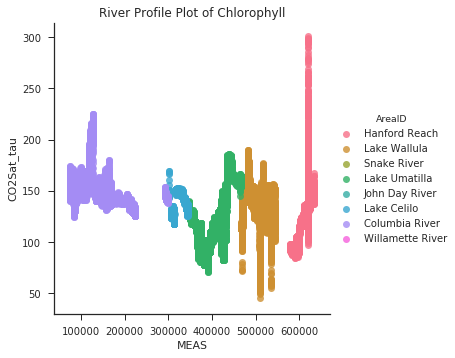

In [57]:
sns.lmplot('MEAS', 'CO2Sat_tau', data=short, hue='AreaID', fit_reg=False)
plt.title('River Profile Plot of Chlorophyll')

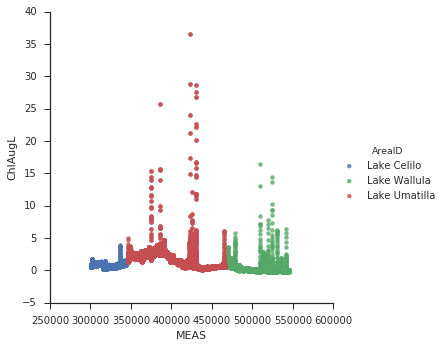

In [48]:
shortDF = data
sns.lmplot('MEAS', 'ChlAugL', data=reservoirs, hue='AreaID', fit_reg=False)

# Tributaries

In [47]:
short = data.loc[data['ChlAugL'] <= 100]
john = short.loc[(short['AreaID'] == 'John Day River')]
will = short.loc[(short['AreaID'] == 'Willamette River')]
snake = short.loc[(short['AreaID'] == 'Snake River')]
tribs = john.append(will).append(snake)

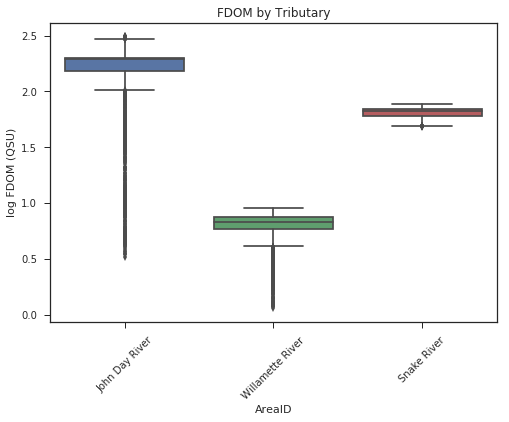

In [59]:
cols = ["John Day River", "Willamette River", "Snake River"]

sns.set_style('ticks')
sns.boxplot(np.log(tribs.fDOMQSU), groupby = tribs.AreaID, order=cols)
plt.xticks(rotation=45)
plt.title('FDOM by Tributary')
plt.ylabel('log FDOM (QSU)')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

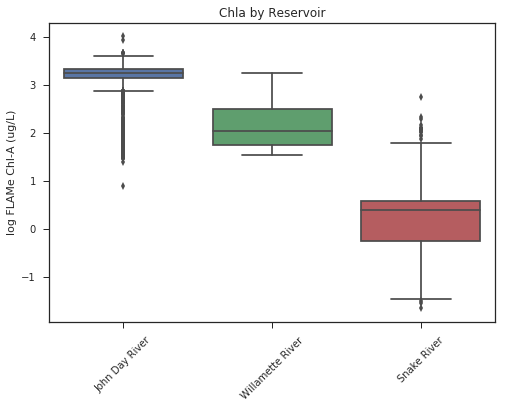

In [49]:
sns.set_style('ticks')
sns.boxplot(np.log(tribs.ChlAugL), groupby = tribs.AreaID, order = cols)
plt.xlabel('')
plt.title('Chla by Tributary')
plt.ylabel('log FLAMe Chl-A (ug/L)')

plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

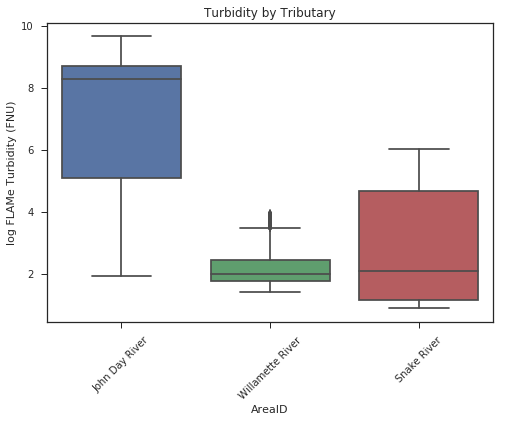

In [50]:
# sed = data.loc[data['sed1'] <= 0.08]
sns.set_style('ticks')
sns.boxplot(tribs.TurbFNU, groupby = tribs.AreaID, order = cols)
plt.title('Turbidity by Tributary')
plt.ylabel('log FLAMe Turbidity (FNU)')
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

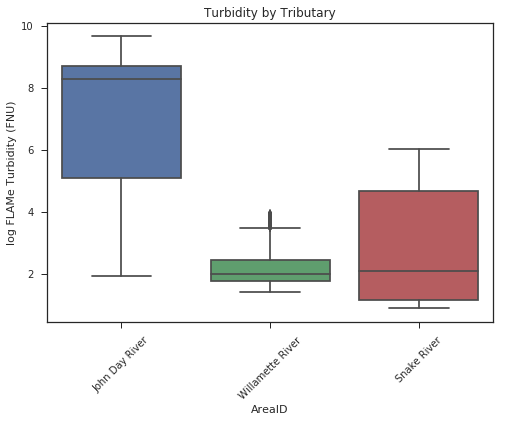

In [60]:
# sed = data.loc[data['sed1'] <= 0.08]
sns.set_style('ticks')
sns.boxplot(tribs.TurbFNU, groupby = tribs.AreaID, order = cols)
plt.title('Turbidity by Tributary')
plt.ylabel('log FLAMe Turbidity (FNU)')
plt.xticks(rotation=45)

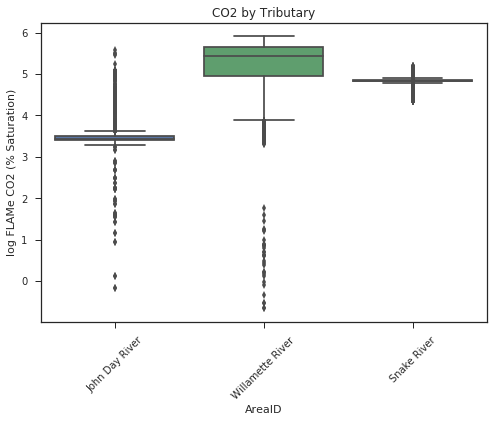

In [61]:
sns.set_style('ticks')
sns.boxplot(np.log(tribs.CO2Sat_tau), groupby = tribs.AreaID, order = cols)
plt.xticks(rotation=45)

plt.title('CO2 by Tributary')
plt.ylabel('log FLAMe CO2 (% Saturation)')

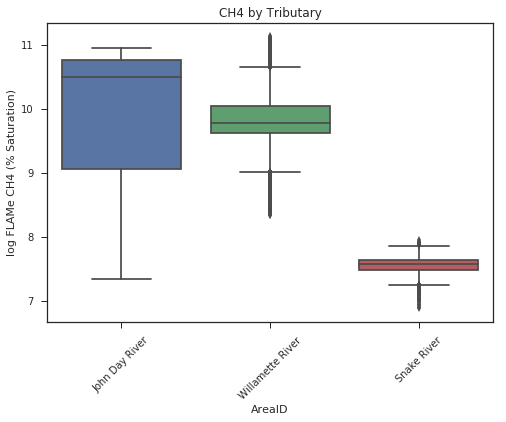

In [64]:
sns.set_style('ticks')
sns.boxplot(np.log(tribs.CH4Sat_tau), groupby = tribs.AreaID, order = cols)
plt.xticks(rotation=45)

plt.title('CH4 by Tributary')
plt.ylabel('log FLAMe CH4 (% Saturation)')

# Stats

In [33]:
# compute one-way ANOVA P value   
f_val, p_val = stats.f_oneway(wallula.ChlAugL, celilo.ChlAugL, umatilla.ChlAugL)  
print "One-way ANOVA P =", p_val  

"This p-value says there is a significant difference between chlorophyll-a in the reservoirs"

One-way ANOVA P = 1.26433938264e-155


'This p-value says there is a significant difference between chlorophyll-a in the reservoirs'

In [72]:
# compute one-way ANOVA P value   
f_val, p_val = stats.f_oneway(data.CO2Sat_tau, data.CH4Sat_tau)  
print "One-way ANOVA P =", p_val  

One-way ANOVA P = nan


In [34]:
model = ols("ChlAugL ~ AreaID", reservoirs).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ChlAugL   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     359.0
Date:                Fri, 26 May 2017   Prob (F-statistic):          1.26e-155
Time:                        17:04:52   Log-Likelihood:            -1.5786e+05
No. Observations:               54399   AIC:                         3.157e+05
Df Residuals:                   54396   BIC:                         3.157e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

In [22]:
short = data.loc[data['ChlAugL'] <= 50]

model = ols("chla1 ~ AreaID", short).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  chla1   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     4529.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        07:46:57   Log-Likelihood:                 16481.
No. Observations:               90331   AIC:                        -3.295e+04
Df Residuals:                   90323   BIC:                        -3.287e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           